In [ ]:
import random
import matplotlib.pyplot as plt
import numpy as np
import time
from datetime import datetime
import pandas as pd
plt.style.use('fivethirtyeight')
pd.options.mode.chained_assignment = None  # default='warn'
import seaborn as sns

In [ ]:
df = pd.read_excel('YNDX_191001_191231_result.xlsx')
df = df.set_index('Unnamed: 0')


In [ ]:
df.index()

TypeError: ignored

In [ ]:
A = []
for i in df.index:
  a = df.loc[i]['Result'].replace('(', '').replace(')', '').split(', ')
  A.append(int(a[0]) - int(a[1]))
df['Res'] = A

In [ ]:
df

,Quik,Slow,Result,Res
Unnamed: 0,,,,
0,1,2,"(5224, 3838)",1386
1,1,3,"(4070, 2978)",1092
2,1,4,"(3480, 2532)",948
3,1,5,"(3104, 2282)",822
4,1,6,"(2861, 2069)",792
...,...,...,...,...
11170,147,149,"(347, 300)",47
11171,147,150,"(280, 252)",28
11172,148,149,"(566, 457)",109


In [ ]:
df.sort_values(by = 'Res', ascending = False).head(50)

,Quik,Slow,Result,Res
Unnamed: 0,,,,
0,1,2,"(5224, 3838)",1386
149,2,3,"(4128, 2975)",1153
1,1,3,"(4070, 2978)",1092
297,3,4,"(3556, 2572)",984
2,1,4,"(3480, 2532)",948
444,4,5,"(3177, 2272)",905
590,5,6,"(2921, 2067)",854
3,1,5,"(3104, 2282)",822
735,6,7,"(2704, 1893)",811


In [ ]:
sorted(df['Res'])[-1]

-23

In [ ]:
answer = np.array([np.nan]*22500).reshape((150, 150))

In [ ]:
res = list(df['Res'])
Slow = list(df['Slow'])
f = 0
for i in df['Quik']:
    answer[i-1, Slow[f]-1] = res[f]
    f += 1

In [ ]:
answer

array([[  nan, 1386., 1092., ...,  241.,  241.,  233.],
       [  nan,   nan, 1153., ...,  148.,  141.,  140.],
       [  nan,   nan,   nan, ...,  112.,  114.,  104.],
       ...,
       [  nan,   nan,   nan, ...,   nan,  109.,   52.],
       [  nan,   nan,   nan, ...,   nan,   nan,   84.],
       [  nan,   nan,   nan, ...,   nan,   nan,   nan]])

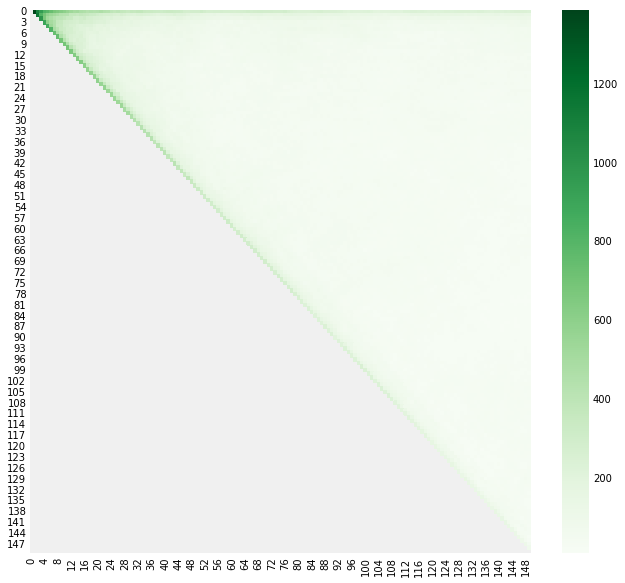

In [ ]:
plt.figure(figsize=(10, 10))
ax = sns.heatmap(answer, cmap = 'Greens')
plt.show()

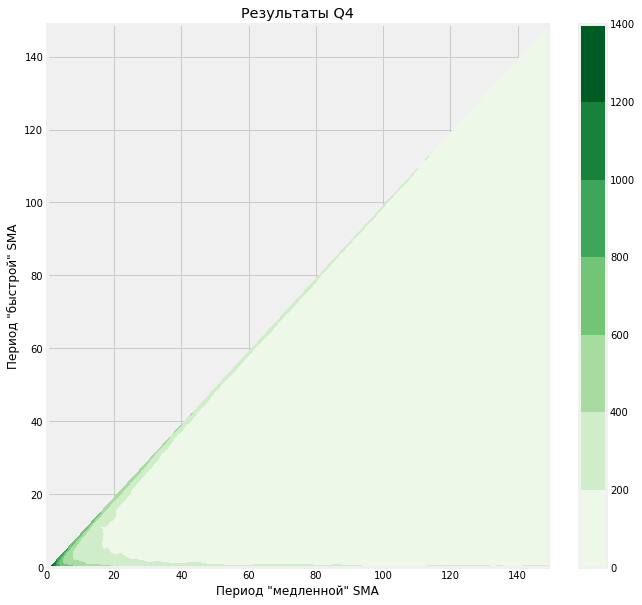

In [ ]:
fig = plt.figure()
fig.set_figwidth(10)    #  ширина Figure
fig.set_figheight(10)    #  высота Figure
ax = plt.contourf(answer, cmap = 'Greens')
plt.colorbar(ax)
plt.title('Результаты Q4')
plt.xlabel('Период "медленной" SMA')
plt.ylabel('Период "быстрой" SMA')
plt.show()

<Figure size 720x720 with 0 Axes>

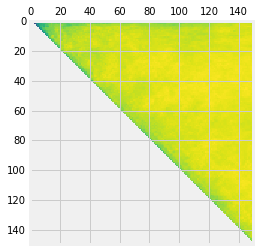

In [ ]:
fig = plt.figure()
fig.set_figwidth(10)    #  ширина Figure
fig.set_figheight(10)    #  высота Figure
f = plt.matshow(answer)
plt.show()

In [ ]:
sum(df['Res'] < 126) / len(df['Res'])

1.0

In [ ]:
S = sorted(list(set(df['Result'])))


In [ ]:
W = []
D = range(min(df['Res']), max(df['Res']) + 1)
for i in D:
  W.append(sum(df['Res'] >= i) / len(df['Res']))

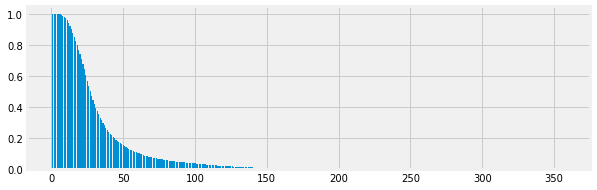

In [ ]:
fig, ax = plt.subplots()

ax.bar(D, W)

#ax.set_facecolor('seashell')
#fig.set_facecolor('floralwhite')
fig.set_figwidth(9)    #  ширина Figure
fig.set_figheight(3)    #  высота Figure

In [ ]:
df['Res'].mean()

10.402863534675616

range(0, 11175)
[-40, -37, -35, -35, -34, -34, -32, -32, -32, -32, -31, -31, -31, -31, -31, -31, -30, -29, -29, -29, -29, -29, -29, -28, -28, -27, -27, -27, -26, -26, -26, -25, -25, -25, -25, -24, -24, -24, -24, -24, -24, -24, -24, -24, -24, -24, -24, -24, -24, -23, -23, -23, -23, -23, -23, -23, -23, -23, -22, -22, -22, -22, -22, -22, -22, -21, -21, -21, -21, -21, -21, -21, -21, -21, -21, -21, -21, -21, -21, -21, -20, -20, -20, -20, -20, -20, -20, -20, -20, -20, -20, -20, -20, -20, -20, -19, -19, -19, -19, -19, -19, -19, -19, -19, -19, -18, -18, -18, -18, -18, -18, -18, -18, -18, -18, -18, -18, -18, -18, -18, -18, -18, -18, -18, -18, -18, -18, -17, -17, -17, -17, -17, -17, -17, -17, -17, -17, -17, -17, -17, -17, -17, -17, -17, -17, -17, -17, -17, -17, -17, -17, -16, -16, -16, -16, -16, -16, -16, -16, -16, -16, -16, -16, -15, -15, -15, -15, -15, -15, -15, -15, -15, -15, -15, -15, -15, -15, -15, -15, -15, -15, -15, -15, -15, -15, -15, -15, -14, -14, -14, -14, -14, -14, -14, -14, -14, -14

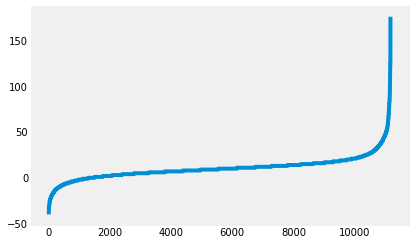

In [ ]:
x = range(0, 11175, 1)
print(x)
y = []
for i in x:
  y.append(sorted(df['Res'])[i])

print(y)
fig, ax = plt.subplots()

ax.plot(x, y)
ax.grid()

(array([1.000e+00, 1.000e+00, 4.000e+00, 4.000e+00, 7.000e+00, 8.000e+00,
        1.000e+01, 2.300e+01, 2.200e+01, 2.500e+01, 4.600e+01, 3.600e+01,
        9.100e+01, 9.600e+01, 1.010e+02, 1.590e+02, 2.090e+02, 2.650e+02,
        6.640e+02, 6.180e+02, 8.770e+02, 1.118e+03, 1.159e+03, 1.205e+03,
        1.060e+03, 1.203e+03, 5.050e+02, 3.740e+02, 2.770e+02, 1.760e+02,
        1.400e+02, 1.480e+02, 7.400e+01, 5.100e+01, 5.100e+01, 4.500e+01,
        4.200e+01, 4.000e+01, 3.300e+01, 2.800e+01, 2.500e+01, 1.500e+01,
        2.400e+01, 1.700e+01, 5.000e+00, 7.000e+00, 8.000e+00, 7.000e+00,
        3.000e+00, 5.000e+00, 6.000e+00, 6.000e+00, 2.000e+00, 4.000e+00,
        2.000e+00, 3.000e+00, 8.000e+00, 4.000e+00, 2.000e+00, 2.000e+00,
        4.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00,
        1.000e+00, 1.000e+00, 3.000e+00, 0.000e+00, 2.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00, 2.000e+00, 2.000e+00, 4.000e+00, 1.000e+00,
        0.000e+00, 0.000e+00, 0.000e+0

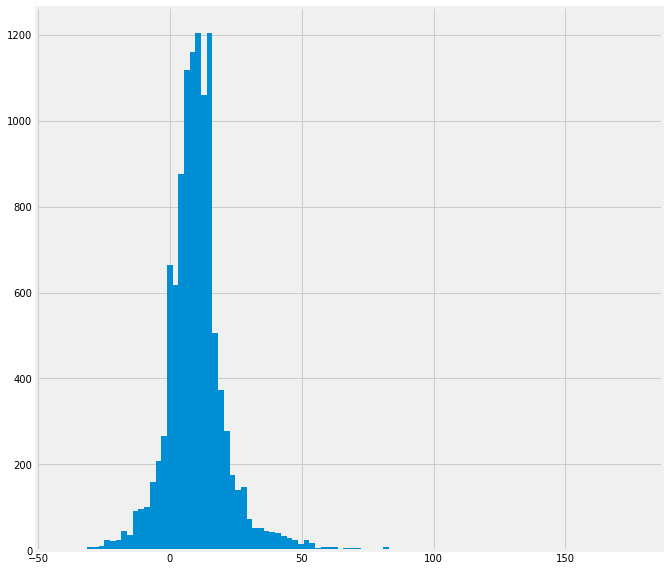

In [ ]:
fig, ax = plt.subplots()
fig.set_figwidth(10)    #  ширина Figure
fig.set_figheight(10) 
ax.hist(df['Res'], bins=100)